In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造数据
np.random.seed(0)
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 20, 100)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

Epoch [100/1000], Loss: 403.5042
Epoch [200/1000], Loss: 403.3275
Epoch [300/1000], Loss: 403.3244
Epoch [400/1000], Loss: 403.3244
Epoch [500/1000], Loss: 403.3243
Epoch [600/1000], Loss: 403.3243
Epoch [700/1000], Loss: 403.3244
Epoch [800/1000], Loss: 403.3244
Epoch [900/1000], Loss: 403.3244
Epoch [1000/1000], Loss: 403.3244


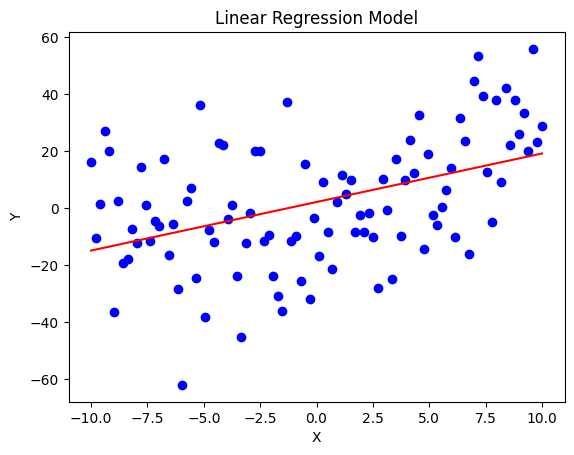

In [11]:
# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)
    
plt.scatter(x, y, color='blue')  # 绘制原始数据点
plt.plot(x, predicted.numpy(), color='red')  # 绘制拟合直线
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.show()

**全连接神经网络基础小作业**

基于torch实战线性回归代码，构造形状像一元二次曲线的数据，
并使用nn.Module提供的forward框架训练一个模型，最后在同一副图中绘制模型的一元二次曲线与构造数据的散点图

Epoch [200/2000], Loss: 364.7045
Epoch [400/2000], Loss: 359.6371
Epoch [600/2000], Loss: 358.1522
Epoch [800/2000], Loss: 356.9801
Epoch [1000/2000], Loss: 355.9023
Epoch [1200/2000], Loss: 354.8993
Epoch [1400/2000], Loss: 353.9651
Epoch [1600/2000], Loss: 353.0949
Epoch [1800/2000], Loss: 352.2846
Epoch [2000/2000], Loss: 351.5298


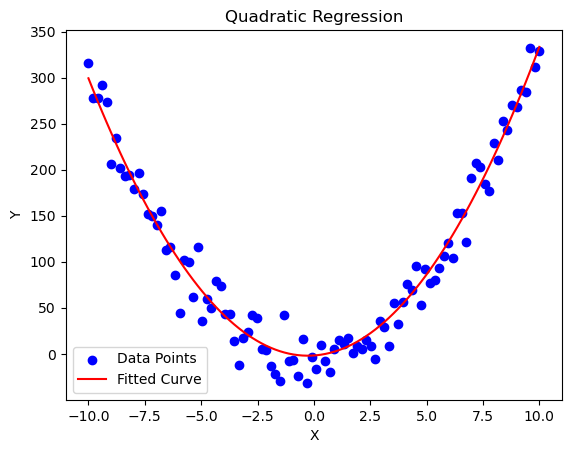

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

#构造一元二次曲线数据
np.random.seed(0)
x = np.linspace(-10, 10, 100)
a, b, c = 3, 2, 1 
y = a * x**2 + b * x + c + np.random.normal(0, 20, 100)  # 添加噪声

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 模型
class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super(QuadraticRegressionModel, self).__init__()
        self.poly = nn.Linear(3, 1)

    def forward(self, x):
        x_poly = torch.cat([x**2, x, torch.ones_like(x)], dim=1)
        return self.poly(x_poly)

# 实例化模型
model = QuadraticRegressionModel()

#损失函数和优化器
criterion = nn.MSELoss()#nn.Module提供的forward框架训练一个模型
optimizer = optim.SGD(model.parameters(), lr=0.0001)

#训练
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

#测试,可视化
with torch.no_grad():
    predicted = model(x_tensor)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, predicted.numpy(), color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Quadratic Regression')
plt.legend()
plt.show()
